In [51]:
import numpy as np
from ifb_framework.slice_browser_2 import jupyter_browser
from ifb_framework.timelapsed_remodelling.visualise import vtkFile_to_dict
from glob import glob
import os

# Important: if you are running this locally in Jupyter (rather than JupyterLab)
# a different backend is needed - replace 'ipympl' below with 'notebook'
%matplotlib ipympl
path = '/Users/matthiaswalle/Documents/test/'
image = 'XCALIB_0062_TL_M??_XT?.AIM*' + '.vti'

jupyter_browser(vtkFile_to_dict(os.path.join(path,image)))

Reading dataset with array name: image_0
Reading dataset with array name: contour_OUT_MASK_image_0
Reading dataset with array name: contour_TRAB_MASK_image_0
Reading dataset with array name: contour_CORT_MASK_image_0
Reading dataset with array name: image_1
Reading dataset with array name: contour_OUT_MASK_image_1
Reading dataset with array name: contour_TRAB_MASK_image_1
Reading dataset with array name: contour_CORT_MASK_image_1
Reading dataset with array name: image_2
Reading dataset with array name: contour_OUT_MASK_image_2
Reading dataset with array name: contour_TRAB_MASK_image_2
Reading dataset with array name: contour_CORT_MASK_image_2
Reading dataset with array name: image_3
Reading dataset with array name: contour_OUT_MASK_image_3
Reading dataset with array name: contour_TRAB_MASK_image_3
Reading dataset with array name: contour_CORT_MASK_image_3
Reading dataset with array name: common_region
Reading dataset with array name: remodelling_0_1
Reading dataset with array name: rem

GridBox(children=(Box(children=(Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'hom…

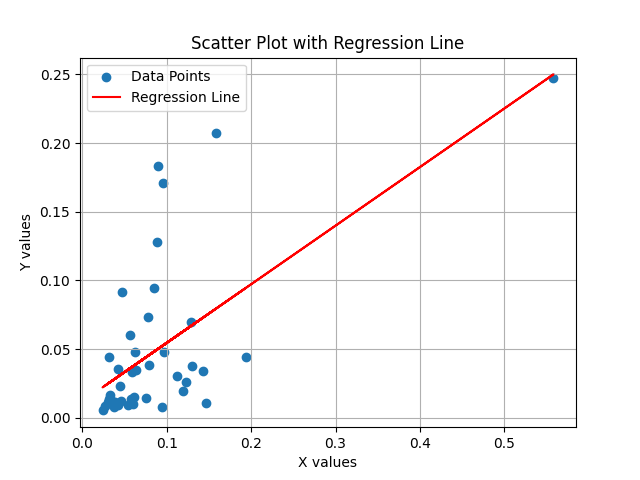

In [15]:
import vtk
import numpy as np
from vtk.util.numpy_support import numpy_to_vtk, vtk_to_numpy
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.concat([pd.read_csv(f) for f in glob('/Users/matthiaswalle/Documents/test/*.csv')])


# Sample data (replace with your own data)
x_data = df[(df['site']=='tibia') & (df['followup']==1)]['FVBV_TRABMASK']
y_data = df[(df['site']=='tibia') & (df['baseline']==2)]['FVBV_TRABMASK']

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
regression_line = slope * x_data + intercept

plt.figure()

# Create the scatter plot
plt.scatter(x_data, y_data, label="Data Points")

# Add the regression line to the plot
plt.plot(x_data, regression_line, color='red', label="Regression Line")

# Set plot labels and title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Scatter Plot with Regression Line")

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()






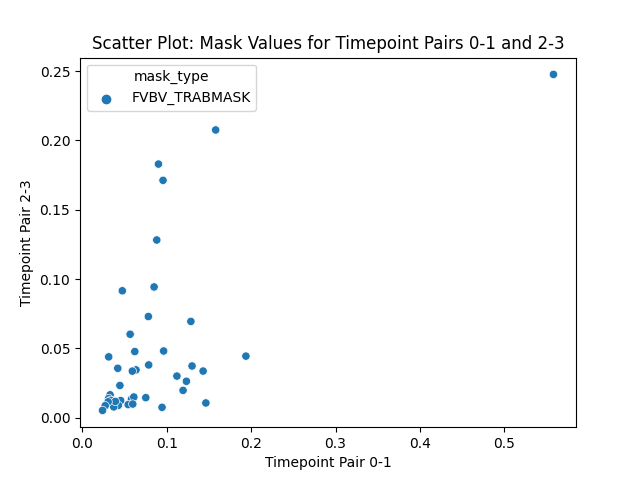

In [43]:
import seaborn as sns

id_vars = ['Unnamed: 0', 'image', 'site', 'baseline', 'followup', 'threshold', 'cluster']
value_vars = ['FVBV_OUTMASK', 'RVBV_OUTMASK', 'FVBV_TRABMASK', 'RVBV_TRABMASK', 'FVBV_CORTMASK', 'RVBV_CORTMASK']
#'BV_OUTMASK',  'BV_CORTMASK','BV_TRABMASK', 
melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='mask_type', value_name='mask_value')

melted_df['timepoint_pair'] = melted_df['baseline'].astype(str) + '-' + melted_df['followup'].astype(str)

# Filter the DataFrame to include only rows with timepoint pairs 0-1 and 2-3
filtered_df = melted_df[melted_df['timepoint_pair'].isin(['0-1', '2-3'])]

# Pivot the DataFrame to have separate columns for each timepoint pair, considering the "site" parameter
pivot_df = filtered_df.pivot(index=['mask_type', 'image','site'], columns='timepoint_pair', values='mask_value').reset_index()
pivot_df = pivot_df[pivot_df['mask_type']=='FVBV_TRABMASK']
pivot_df = pivot_df[pivot_df['site']=='tibia']
# Create a scatter plot
plt.figure()
sns.scatterplot(x='0-1', y='2-3', hue='mask_type', data=pivot_df)
plt.xlabel('Timepoint Pair 0-1')
plt.ylabel('Timepoint Pair 2-3')
plt.title('Scatter Plot: Mask Values for Timepoint Pairs 0-1 and 2-3')
plt.show()

In [46]:
pivot_df.sort_values('0-1',ascending=False)

timepoint_pair,mask_type,image,site,0-1,2-3
176,FVBV_TRABMASK,XCALIB_0022_TL_M??_XT?.AIM*,tibia,0.558147,0.247614
213,FVBV_TRABMASK,XCALIB_0061_TL_M??_XT?.AIM*,tibia,0.193861,0.044449
180,FVBV_TRABMASK,XCALIB_0026_TL_M??_XT?.AIM*,tibia,0.158081,0.207543
174,FVBV_TRABMASK,XCALIB_0021_TL_M??_XT?.AIM*,tibia,0.146450,0.010666
169,FVBV_TRABMASK,XCALIB_0015_TL_M??_XT?.AIM*,tibia,0.143173,0.033675
165,FVBV_TRABMASK,XCALIB_0009_TR_M??_XT?.AIM*,tibia,0.130055,0.037328
167,FVBV_TRABMASK,XCALIB_0011_TL_M??_XT?.AIM*,tibia,0.128696,0.069468
178,FVBV_TRABMASK,XCALIB_0024_TL_M??_XT?.AIM*,tibia,0.123385,0.026310
207,FVBV_TRABMASK,XCALIB_0057_TL_M??_XT?.AIM*,tibia,0.119429,0.019749
185,FVBV_TRABMASK,XCALIB_0030_TL_M??_XT?.AIM*,tibia,0.112145,0.030048


In [33]:
melted_df

,timepoint_pair,mask_type,variable,value
0,0-1,FVBV_OUTMASK,mask_value,0.019582
1,2-3,FVBV_OUTMASK,mask_value,0.007253
2,0-1,FVBV_OUTMASK,mask_value,0.121499
3,2-3,FVBV_OUTMASK,mask_value,0.003994
4,0-1,FVBV_OUTMASK,mask_value,0.042714
...,...,...,...,...
943,2-3,RVBV_CORTMASK,mask_value,0.022087
944,0-1,RVBV_CORTMASK,mask_value,0.004957
945,2-3,RVBV_CORTMASK,mask_value,0.001977
946,0-1,RVBV_CORTMASK,mask_value,0.019140


In [23]:
np.max(melted_df['FVBV_OUTMASK'])

KeyError: 'FVBV_OUTMASK'